In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import re
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
input_data = pd.read_csv("User_movie_review.csv")

In [3]:
input_data.head()

,class,text
0,Pos,stuart little is one of the best family ...
1,Neg,a movie like mortal kombat annihilation wor...
2,Neg,and just when you thought joblo was getting a...
3,Pos,every now and then a movie comes along from a...
4,Neg,for about twenty minutes into mission impossi...


In [4]:
input_data['class'].value_counts()

Pos    1000
Neg    1000
Name: class, dtype: int64

In [5]:
def tokenization(text) :
    stemmer = PorterStemmer()
    text = re.sub('\W+|\d+|_'," ",text)
    text = stemmer.stem(text)
    tokens = word_tokenize(text)
    return tokens

In [6]:
# Using CountVectorizer and MultinomialNB
input_data_train= input_data[:1900]
input_data_test = input_data[1900:]
pipline = Pipeline([
    ('vector',CountVectorizer(min_df=5,tokenizer=tokenization,stop_words=stopwords.words('english'))),
    ('classifier',MultinomialNB())
])
pipline.fit(input_data_train['text'], input_data_train['class'])
predict = pipline.predict(input_data_test['text'])
print(classification_report(input_data_test['class'],predict))

             precision    recall  f1-score   support

        Neg       0.77      0.85      0.81        48
        Pos       0.85      0.77      0.81        52

avg / total       0.81      0.81      0.81       100



In [7]:
# Using CountVectorizer and RandomForestClassifier
input_data_train= input_data[:1900]
input_data_test = input_data[1900:]
pipline = Pipeline([
    ('vector',CountVectorizer(min_df=5,tokenizer=tokenization,stop_words=stopwords.words('english'))),
    ('classifier',RandomForestClassifier(n_estimators=1500))
])
pipline.fit(input_data_train['text'], input_data_train['class'])
predict = pipline.predict(input_data_test['text'])
print(classification_report(input_data_test['class'],predict))

             precision    recall  f1-score   support

        Neg       0.84      0.88      0.86        48
        Pos       0.88      0.85      0.86        52

avg / total       0.86      0.86      0.86       100



In [8]:
# Using TfidfVectorizer and MultinomialNB
input_data_train= input_data[:1900]
input_data_test = input_data[1900 :]
pipline = Pipeline([
    ('vector',TfidfVectorizer(min_df=5,tokenizer=tokenization,stop_words=stopwords.words('english'))),
    ('classifier',MultinomialNB())
])
pipline.fit(input_data_train['text'], input_data_train['class'])
predict = pipline.predict(input_data_test['text'])
print(classification_report(input_data_test['class'],predict))

             precision    recall  f1-score   support

        Neg       0.76      0.85      0.80        48
        Pos       0.85      0.75      0.80        52

avg / total       0.81      0.80      0.80       100



In [9]:
# Using TfidfVectorizer and RandomForestClassifier
input_data_train= input_data[:1900]
input_data_test = input_data[1900 :]
pipline = Pipeline([
    ('vector',TfidfVectorizer(min_df=5,tokenizer=tokenization,stop_words=stopwords.words('english'))),
    ('classifier',RandomForestClassifier(n_estimators=1500))
])
pipline.fit(input_data_train['text'], input_data_train['class'])
predict = pipline.predict(input_data_test['text'])
print(classification_report(input_data_test['class'],predict))

             precision    recall  f1-score   support

        Neg       0.76      0.92      0.83        48
        Pos       0.90      0.73      0.81        52

avg / total       0.83      0.82      0.82       100



In [10]:
tfidf = TfidfVectorizer(min_df=5,tokenizer=tokenization,stop_words=stopwords.words('english'))
df_tfidf = pd.DataFrame(data=tfidf.fit_transform(input_data_train['text']).toarray(),columns=tfidf.get_feature_names())
df_tfidf['class'] = input_data_train['class']

In [11]:
pca = PCA(n_components=2,random_state=0)
components =pd.DataFrame(pca.fit_transform(df_tfidf.drop(['class'], axis=1)),columns=['component1','component2'])
components['out'] = df_tfidf['class']

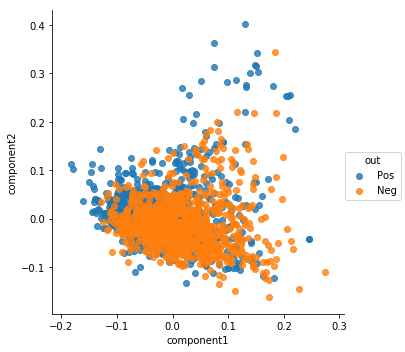

In [12]:
sns.lmplot(data=components,x='component1',y='component2',fit_reg=False,hue='out')